Quantitative techniques for financial analysis 

Students: Ilie Denisa-Maria & Toma Claudia Andreea

Master of Applied Statistics and Data Science 

Bucharest

2018 - 2019


In [12]:
# Import libraries

import requests
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math
from matplotlib import style
style.use('tableau-colorblind10')

np.random.seed(19680801)
api_key='XMD8MYIOLFQ143UO'

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 10]

In [2]:
# Function for reading data from Alpha Vantage API

def get_data(ticker_symbol, company):
    
    URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol='+ticker_symbol+'&outputsize=full&apikey='+api_key
    
    data=requests.get(URL.format(api_key))
    data=data.json()
    data=data['Time Series (Daily)']
    df=pd.DataFrame(columns=['date','open','high','low','close','adjusted close', 'volume'])
    for d,p in data.items():
        date=datetime.datetime.strptime(d,'%Y-%m-%d')
        data_row=[date,
                  float(p['1. open']),
                  float(p['2. high']),
                  float(p['3. low']),
                  float(p['4. close']),
                  float(p['5. adjusted close']),
                  int(p['6. volume'])]
        df.loc[-1,:]=data_row
        df.index=df.index+1
    df=df.sort_values('date')
    df['symbol'] = ticker_symbol
    df['company'] = company
    return df

In [3]:
# Data extraction call

SPY = get_data('SPY', 'SPDR S&P 500 ETF')
time.sleep(30)
AAPL = get_data('AAPL', 'Apple Inc')
time.sleep(30)
AMZN = get_data('AMZN', 'Amazon.com Inc')
time.sleep(30)
FB = get_data('FB', 'Facebook Inc')
time.sleep(30)
GOOG = get_data('GOOG', 'Alphabet Inc')
time.sleep(30)
MSFT = get_data('MSFT', 'Microsoft Corp')
time.sleep(30)
NFLX = get_data('NFLX', 'Netflix Inc')

In [4]:
GOOG.head()

,date,open,high,low,close,adjusted close,volume,symbol,company
0,2014-03-27 00:00:00,568,568,552.92,558.46,558.46,13100,GOOG,Alphabet Inc
1,2014-03-28 00:00:00,561.2,566.43,558.67,559.99,559.99,41100,GOOG,Alphabet Inc
2,2014-03-31 00:00:00,566.89,567,556.93,556.97,556.97,10800,GOOG,Alphabet Inc
3,2014-04-01 00:00:00,558.71,568.45,558.71,567.16,567.16,7900,GOOG,Alphabet Inc
4,2014-04-02 00:00:00,565.106,604.83,562.19,567,567,146700,GOOG,Alphabet Inc


In [5]:
# Slicing function of the dataframe for 2013+

def slice_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    start_date = '2013-01-01'
    end_date = str(datetime.datetime.now())
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    return df

In [6]:
# Slicing function call 

SPY = slice_dataframe(SPY)
AAPL = slice_dataframe(AAPL)
AMZN = slice_dataframe(AMZN)
FB = slice_dataframe(FB)
GOOG = slice_dataframe(GOOG)
MSFT = slice_dataframe(MSFT)
NFLX = slice_dataframe(NFLX)

In [7]:
GOOG.head()

,date,open,high,low,close,adjusted close,volume,symbol,company
0,2014-03-27,568,568,552.92,558.46,558.46,13100,GOOG,Alphabet Inc
1,2014-03-28,561.2,566.43,558.67,559.99,559.99,41100,GOOG,Alphabet Inc
2,2014-03-31,566.89,567,556.93,556.97,556.97,10800,GOOG,Alphabet Inc
3,2014-04-01,558.71,568.45,558.71,567.16,567.16,7900,GOOG,Alphabet Inc
4,2014-04-02,565.106,604.83,562.19,567,567,146700,GOOG,Alphabet Inc


In [8]:
# Create formatted dataframe - data & symbols

df = SPY[['date', 'adjusted close']].set_index('date')
df = df.rename(columns={'adjusted close' : 'SPY'})

df_temp = AAPL[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'AAPL'})
df = df.join(df_temp)

df_temp = AMZN[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'AMZN'})
df = df.join(df_temp)

df_temp = FB[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'FB'})
df = df.join(df_temp)

df_temp = GOOG[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'GOOG'})
df = df.join(df_temp)

df_temp = MSFT[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'MSFT'})
df = df.join(df_temp)

df_temp = NFLX[['date', 'adjusted close']].set_index('date')
df_temp = df_temp.rename(columns={'adjusted close' : 'NFLX'})
df = df.join(df_temp)

In [9]:
df.head()

,SPY,AAPL,AMZN,FB,GOOG,MSFT,NFLX
date,,,,,,,
2013-01-02,129.062,69.3226,257.31,28,NaN,23.5942,13.1443
2013-01-03,128.774,68.4471,258.48,27.77,NaN,23.2782,13.7986
2013-01-04,129.335,66.541,259.15,28.76,NaN,22.8425,13.7114
2013-01-07,128.982,66.1496,268.459,29.4213,NaN,22.7998,14.1715
2013-01-08,128.611,66.3276,266.38,29.0607,NaN,22.6802,13.8795


In [10]:
# Graphical representation of the evolution of stock prices

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=11)
    ax.set_xlabel("Date", fontsize=11)
    ax.set_ylabel("Price", fontsize=11)
    plt.show()

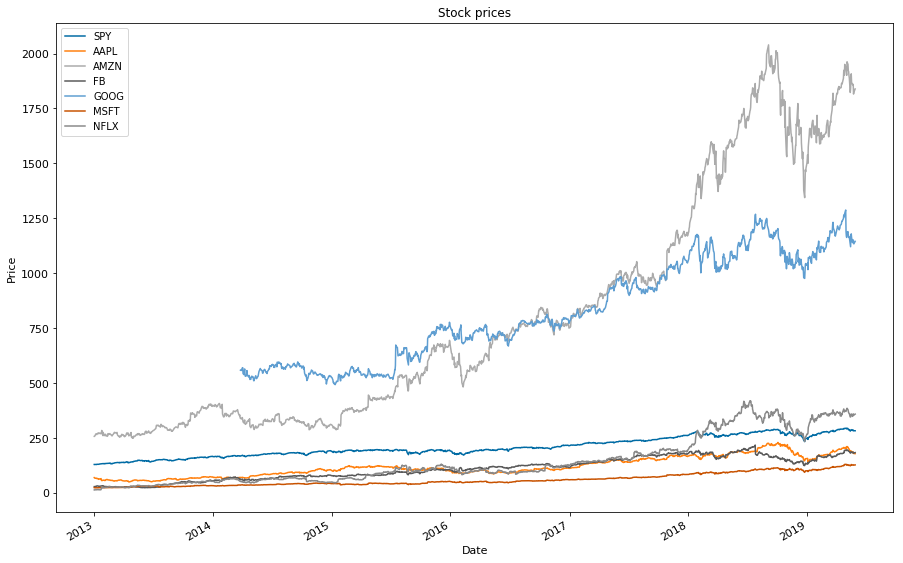

In [13]:
plot_data(df)

In [14]:
# Check missing values

df.isnull().values.any()

True

In [15]:
# Fill missing values through Forward and Backward fill

df.fillna(method="ffill",inplace=True)
df.fillna(method="bfill",inplace=True)

In [16]:
df.isnull().values.any()

False

In [17]:
# Testing the random-walk hypothesis

from statsmodels.tsa.stattools import adfuller

results = adfuller(df['SPY'])
print('SPY\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['AAPL'])
print('AAPL\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['AMZN'])
print('AMZN\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['FB'])
print('FB\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['GOOG'])
print('GOOG\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['MSFT'])
print('MSFT\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(df['NFLX'])
print('NFLX\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')


SPY

(-0.6948195728555026, 0.8480868258534984, 17, 1593, {'1%': -3.434461656404719, '5%': -2.863356053770622, '10%': -2.567736831977157}, 6255.002394987333)
P-value: 0.8480868258534984

AAPL

(-1.203002779033773, 0.6723026601187155, 17, 1593, {'1%': -3.434461656404719, '5%': -2.863356053770622, '10%': -2.567736831977157}, 6715.700235031039)
P-value: 0.6723026601187155

AMZN

(0.6117822430682381, 0.9879024693111939, 24, 1586, {'1%': -3.434479833188833, '5%': -2.8633640766248742, '10%': -2.567741104112434}, 13708.498851921944)
P-value: 0.9879024693111939

FB

(-1.0736437450336234, 0.7254672361781355, 0, 1610, {'1%': -3.4344181718827462, '5%': -2.8633368604103104, '10%': -2.567726611627638}, 7176.708117631057)
P-value: 0.7254672361781355

GOOG

(-0.12232058853210181, 0.9471694330418993, 11, 1599, {'1%': -3.4344462031760283, '5%': -2.8633492329988335, '10%': -2.5677331999518147}, 12229.057426923195)
P-value: 0.9471694330418993

MSFT

(1.8504796446176914, 0.9984440513617515, 8, 1602, {'1%':

In [18]:
# Compute daily returns

def compute_daily_return(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.iloc[0,:] = 0 
    return daily_returns

In [19]:
daily_returns = compute_daily_return(df)

In [20]:
daily_returns.head()

,SPY,AAPL,AMZN,FB,GOOG,MSFT,NFLX
date,,,,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2013-01-03,-0.002231,-0.012629,0.004547,-0.008214,0.0,-0.013393,0.049778
2013-01-04,0.004363,-0.027848,0.002592,0.035650,0.0,-0.018717,-0.006319
2013-01-07,-0.002736,-0.005882,0.035922,0.022994,0.0,-0.001869,0.033556
2013-01-08,-0.002877,0.002691,-0.007745,-0.012256,0.0,-0.005246,-0.020605


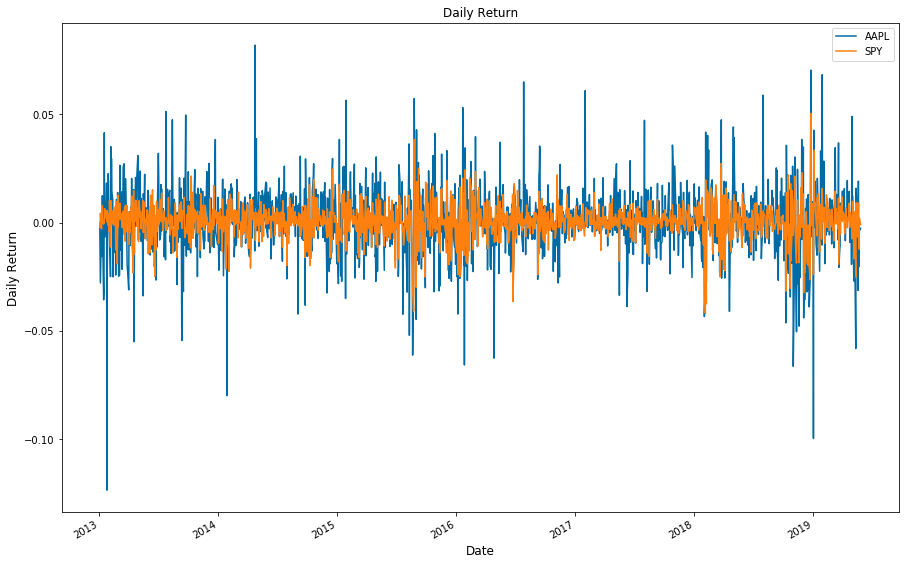

In [62]:
ax = daily_returns[['AAPL','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

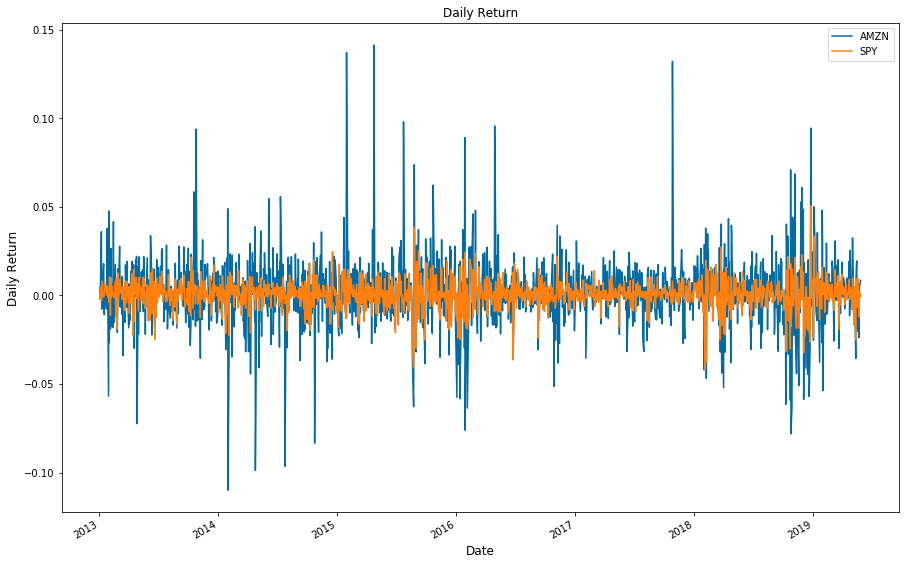

In [63]:
ax = daily_returns[['AMZN','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

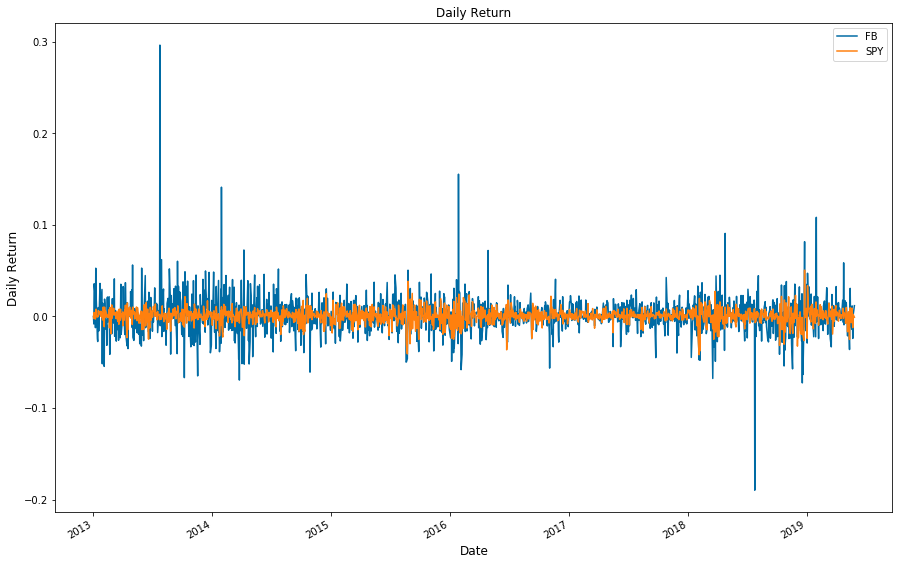

In [52]:
ax = daily_returns[['FB','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

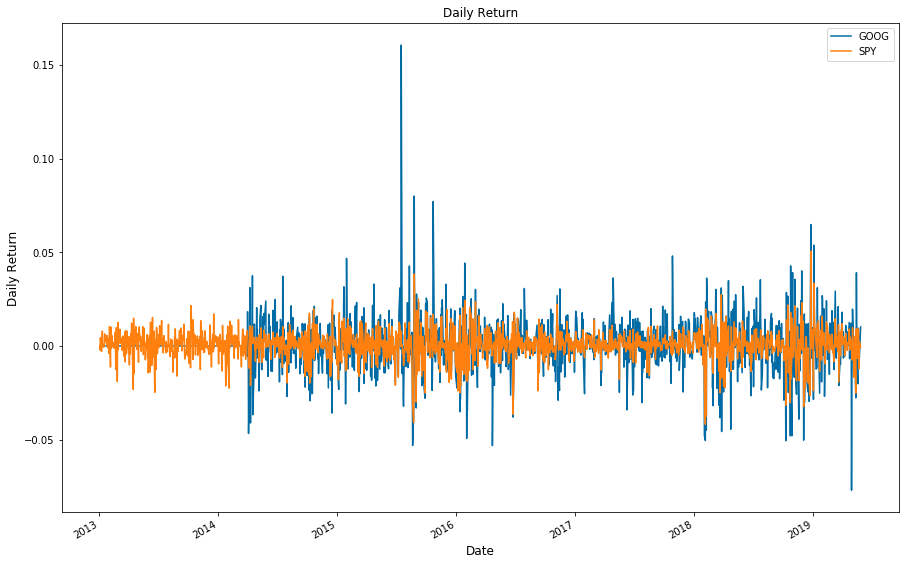

In [64]:
ax = daily_returns[['GOOG','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

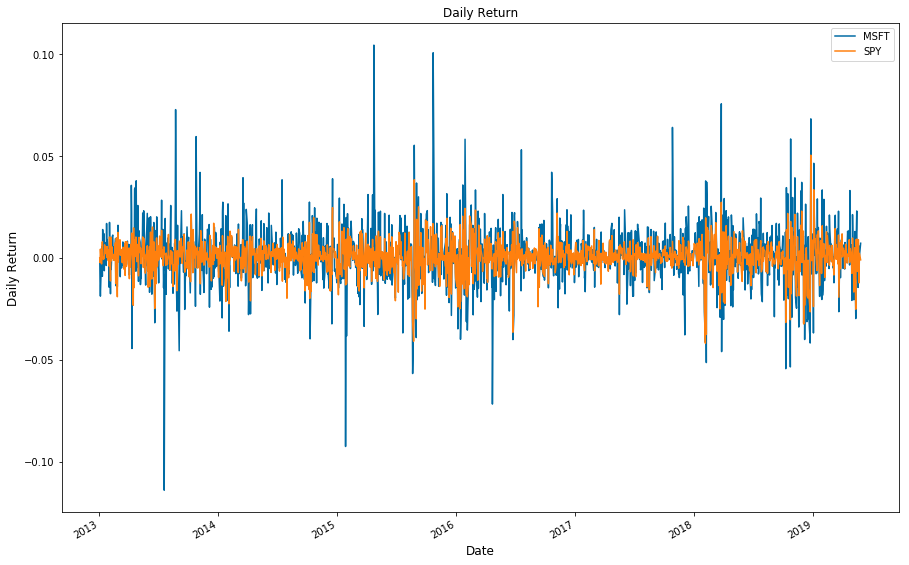

In [65]:
ax = daily_returns[['MSFT','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

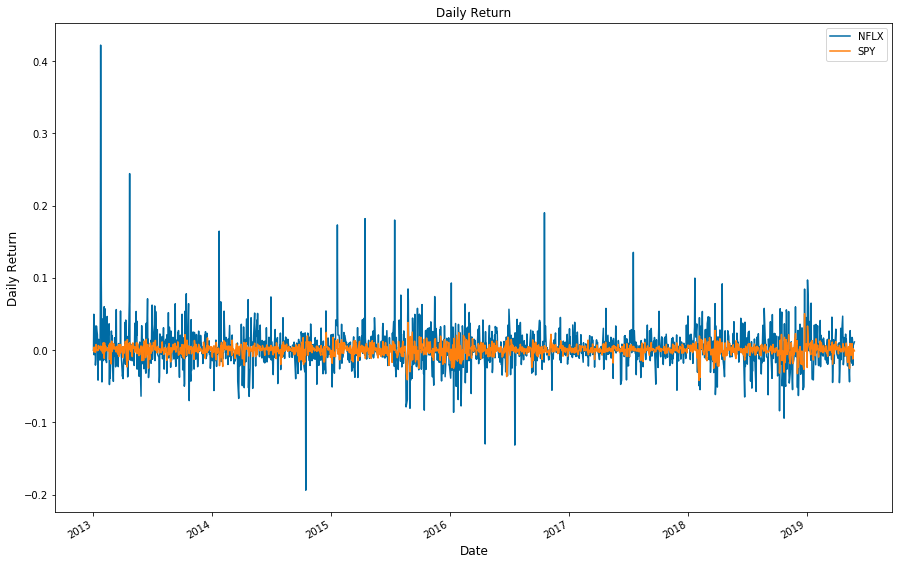

In [66]:
ax = daily_returns[['NFLX','SPY']].plot(title='Daily Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Daily Return", fontsize=12)
#ax.legend(loc='lower left')
plt.show()

In [22]:
results = adfuller(daily_returns['SPY'])
print('SPY\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['AAPL'])
print('AAPL\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['AMZN'])
print('AMZN\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['FB'])
print('FB\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['GOOG'])
print('GOOG\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['MSFT'])
print('MSFT\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

results = adfuller(daily_returns['NFLX'])
print('NFLX\n')
print(results)
print('P-value: ' + str(results[1]) + '\n')

SPY

(-29.74561479578862, 0.0, 1, 1609, {'1%': -3.434420704318943, '5%': -2.863337978194062, '10%': -2.567727206839557}, -10759.672561156316)
P-value: 0.0

AAPL

(-14.136482714267752, 2.2853426855529784e-26, 7, 1603, {'1%': -3.4344359653950125, '5%': -2.8633447142106703, '10%': -2.5677307937238703}, -8722.08478116181)
P-value: 2.2853426855529784e-26

AMZN

(-21.763875123760304, 0.0, 3, 1607, {'1%': -3.4344257786617938, '5%': -2.8633402179388607, '10%': -2.567728399488238}, -8075.989582985925)
P-value: 0.0

FB

(-40.212856298777815, 0.0, 0, 1610, {'1%': -3.4344181718827462, '5%': -2.8633368604103104, '10%': -2.567726611627638}, -7783.997305442506)
P-value: 0.0

GOOG

(-14.396466916234193, 8.650914329909615e-27, 10, 1600, {'1%': -3.4344436389240722, '5%': -2.8633481011816406, '10%': -2.567732597265625}, -9157.961730724355)
P-value: 8.650914329909615e-27

MSFT

(-16.95238632593484, 9.440095638248685e-30, 7, 1603, {'1%': -3.4344359653950125, '5%': -2.8633447142106703, '10%': -2.56773079372

mean = 0.0005190828394868445
std = 0.008073130198119652
kurtosis = 3.7880660524623484


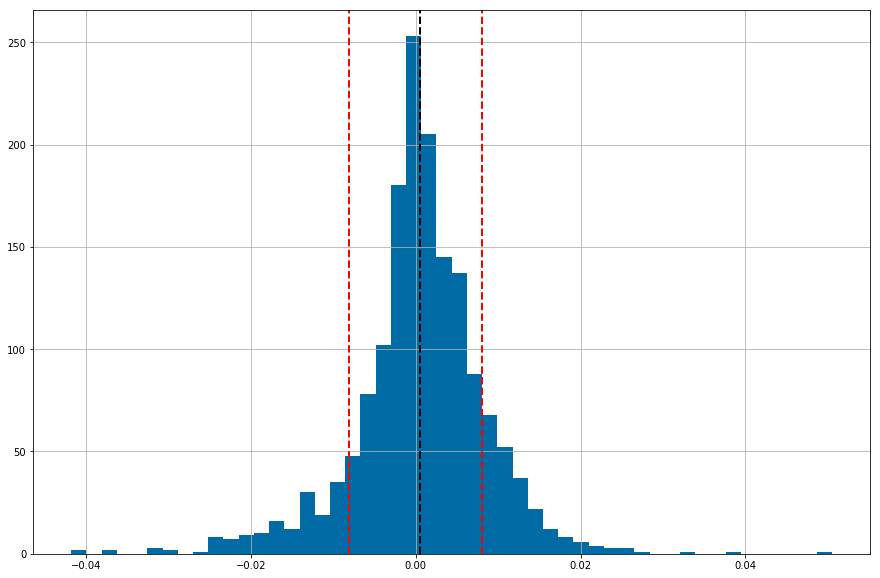

In [23]:
# Histogram of daily returns of shares

daily_returns['SPY'].hist(bins=50) 

mean = daily_returns['SPY'].mean()
print("mean =", mean)

std = daily_returns['SPY'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['SPY'].kurtosis()) # daca este mai mare decat zero -> fat tails

mean = 0.0007131148634500233
std = 0.015830103106363725
kurtosis = 5.864669451896653


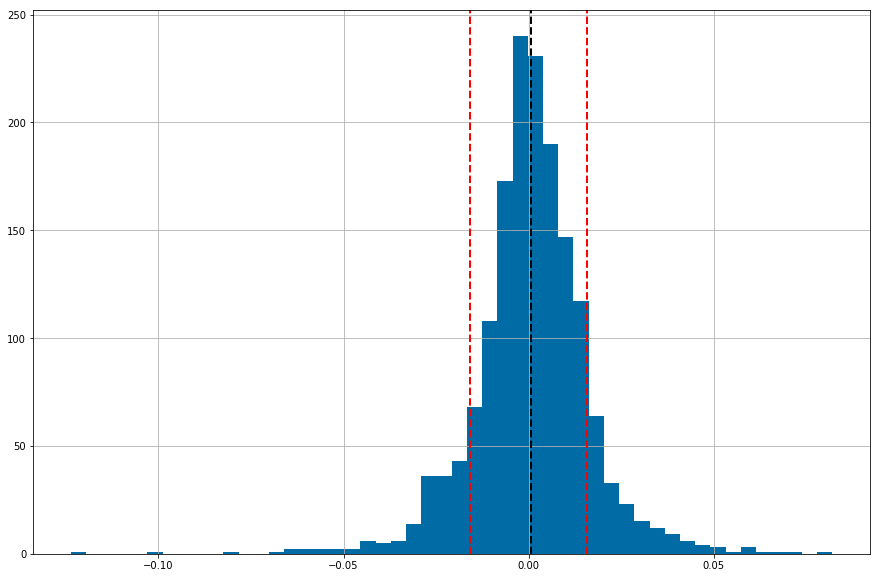

In [24]:
daily_returns['AAPL'].hist(bins=50) 

mean = daily_returns['AAPL'].mean()
print("mean =", mean)

std = daily_returns['AAPL'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['AAPL'].kurtosis()) # daca este mai mare decat zero -> fat tails

mean = 0.001400533291845229
std = 0.018979949458618226
kurtosis = 8.889443000556673


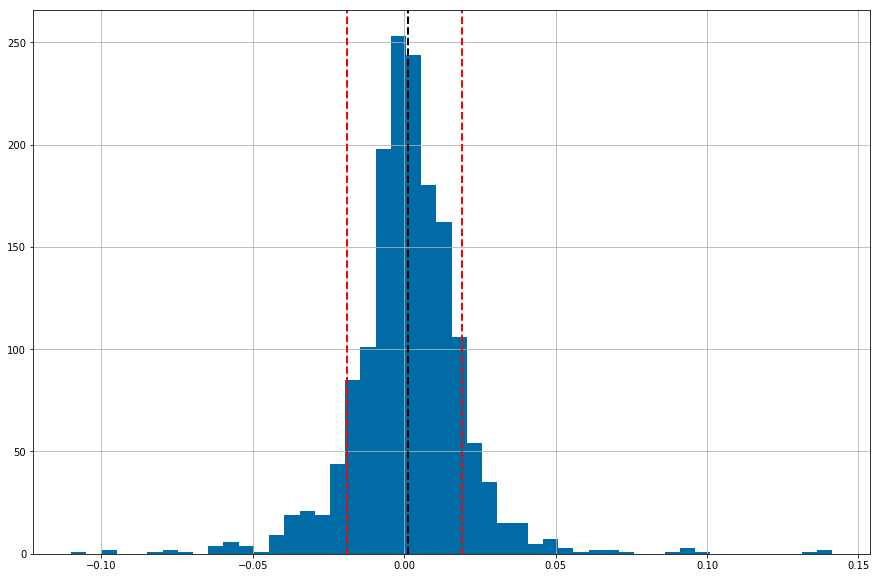

In [25]:
daily_returns['AMZN'].hist(bins=50) 

mean = daily_returns['AMZN'].mean()
print("mean =", mean)

std = daily_returns['AMZN'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['AMZN'].kurtosis()) # daca este mai mare decat zero -> fat tails

mean = 0.0013797059641358035
std = 0.020847847366079315
kurtosis = 32.64308037220305


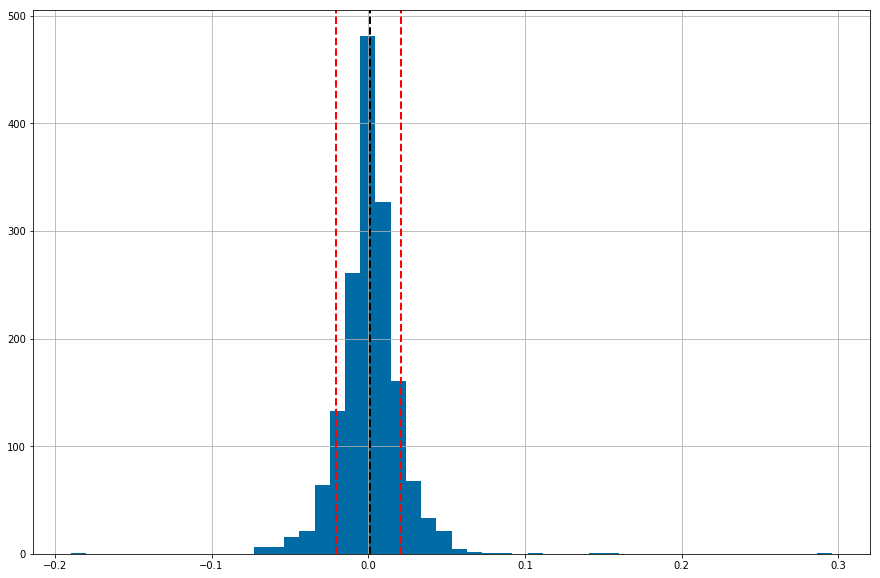

In [67]:
daily_returns['FB'].hist(bins=50) 

mean = daily_returns['FB'].mean()
print("mean =", mean)

std = daily_returns['FB'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['FB'].kurtosis()) # daca este mai mare decat zero -> fat tails

mean = 0.0005346431798168213
std = 0.013386404055185375
kurtosis = 16.397688080629273


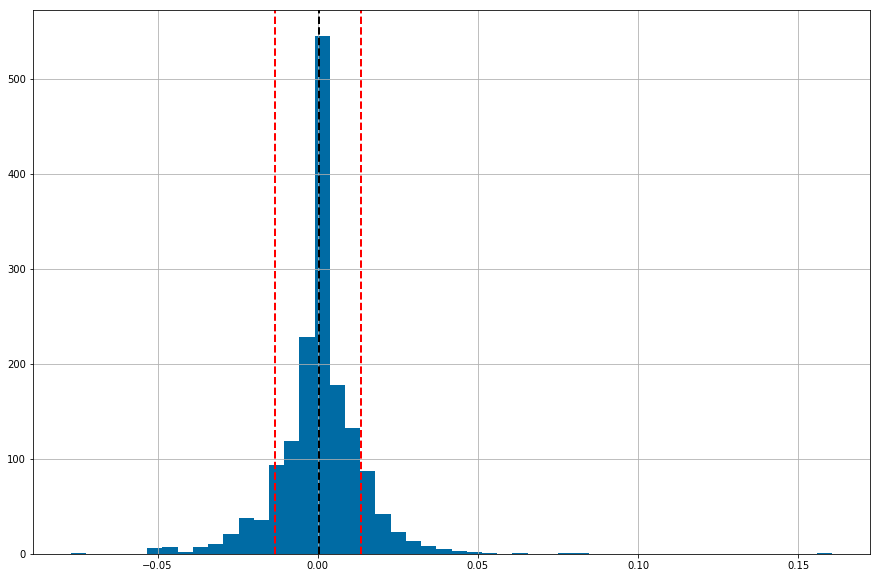

In [68]:
daily_returns['GOOG'].hist(bins=50) 

mean = daily_returns['GOOG'].mean()
print("mean =", mean)

std = daily_returns['GOOG'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['GOOG'].kurtosis()) # daca este mai mare decat zero -> fat tails

mean = 0.0011536936793956358
std = 0.014677748299541772
kurtosis = 8.32483725247857


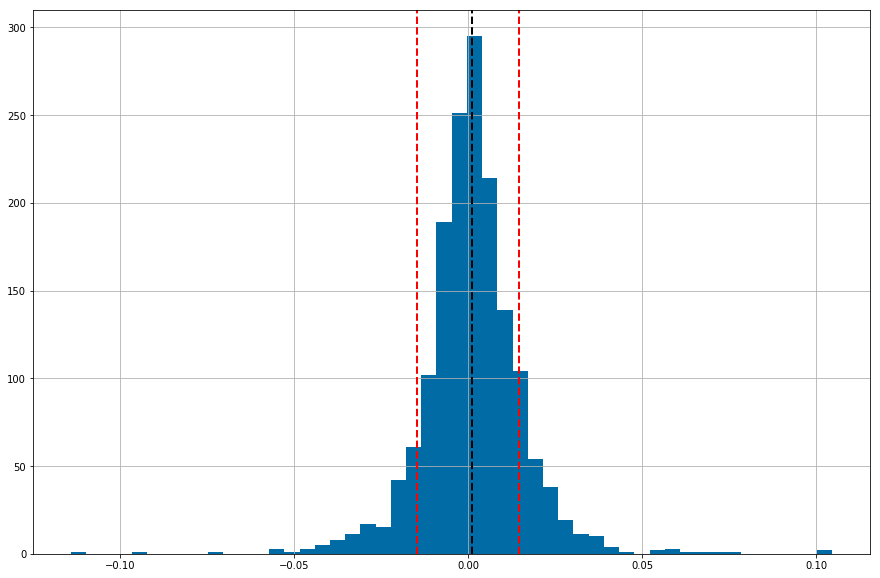

In [69]:
daily_returns['MSFT'].hist(bins=50) 

mean = daily_returns['MSFT'].mean()
print("mean =", mean)

std = daily_returns['MSFT'].std()
print("std =", std)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)

# Calcul Kurtosis
print("kurtosis =",daily_returns['MSFT'].kurtosis()) # daca este mai mare decat zero -> fat tails

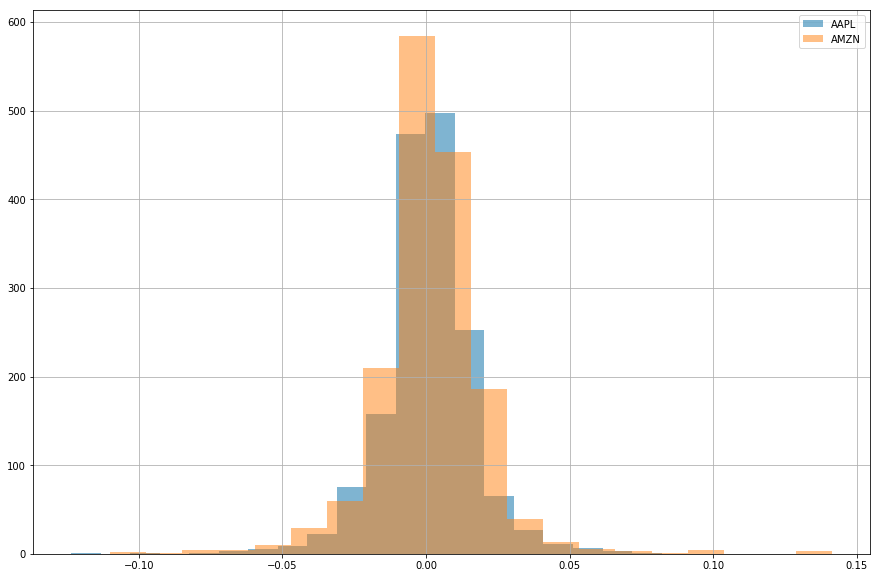

In [26]:
# Combined histograms of daily returns on shares

daily_returns['AAPL'].hist(bins=20, label="AAPL", alpha = 0.5)
daily_returns['AMZN'].hist(bins=20, label="AMZN", alpha = 0.5)
plt.legend(loc='upper right')

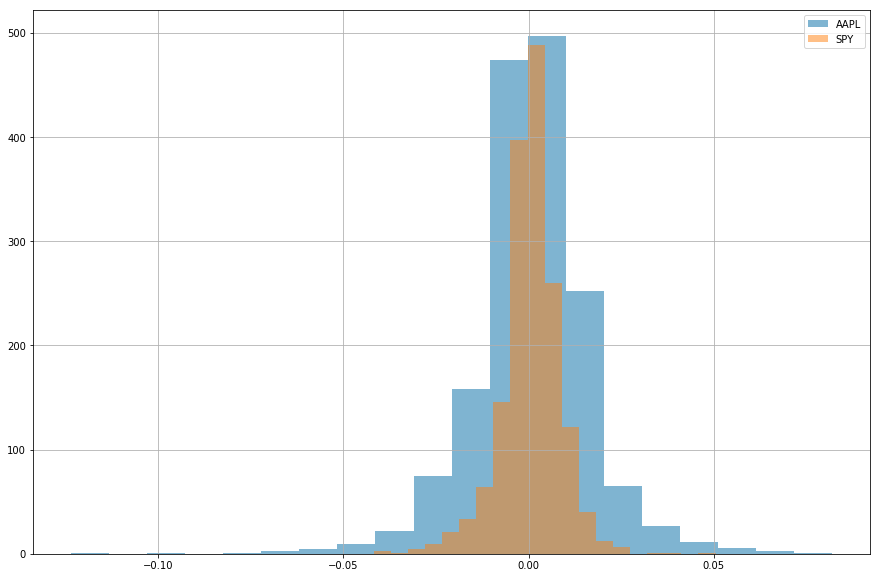

In [70]:
daily_returns['AAPL'].hist(bins=20, label="AAPL", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

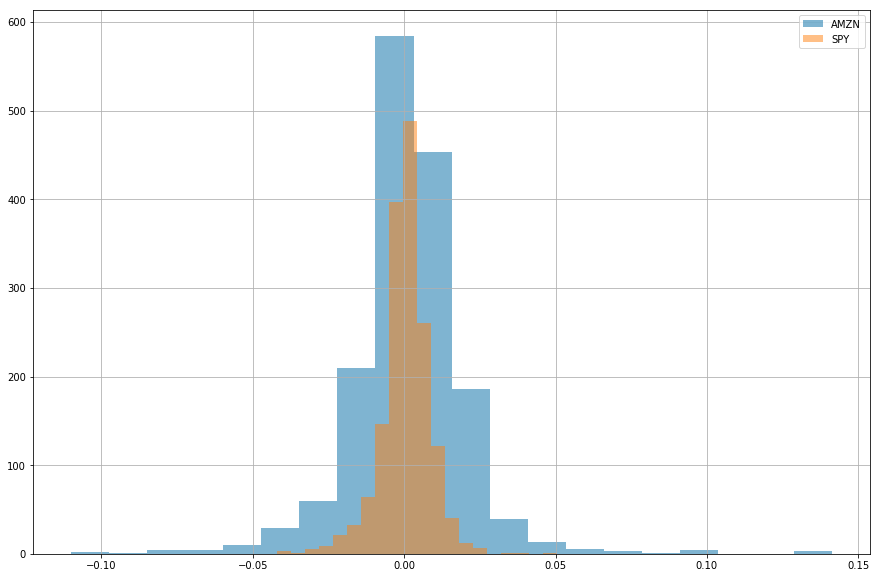

In [71]:
daily_returns['AMZN'].hist(bins=20, label="AMZN", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

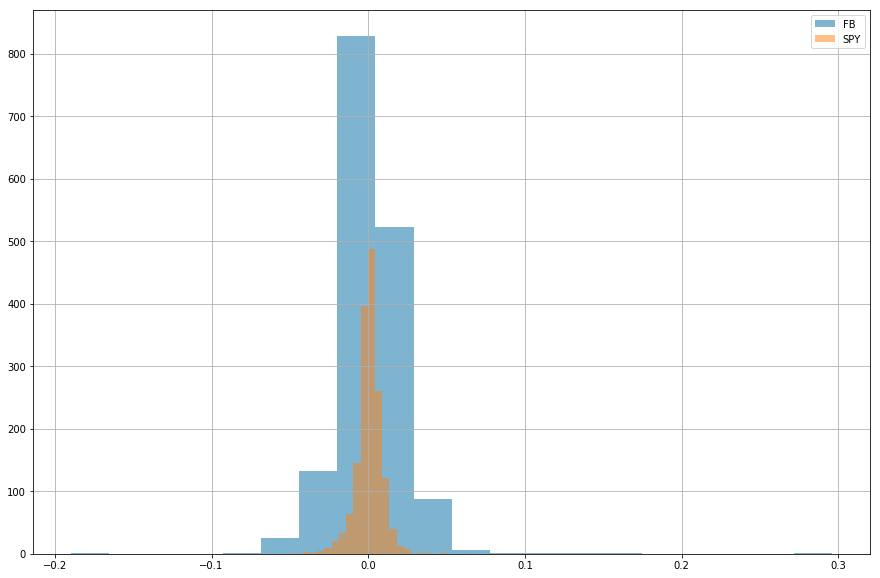

In [72]:
daily_returns['FB'].hist(bins=20, label="FB", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

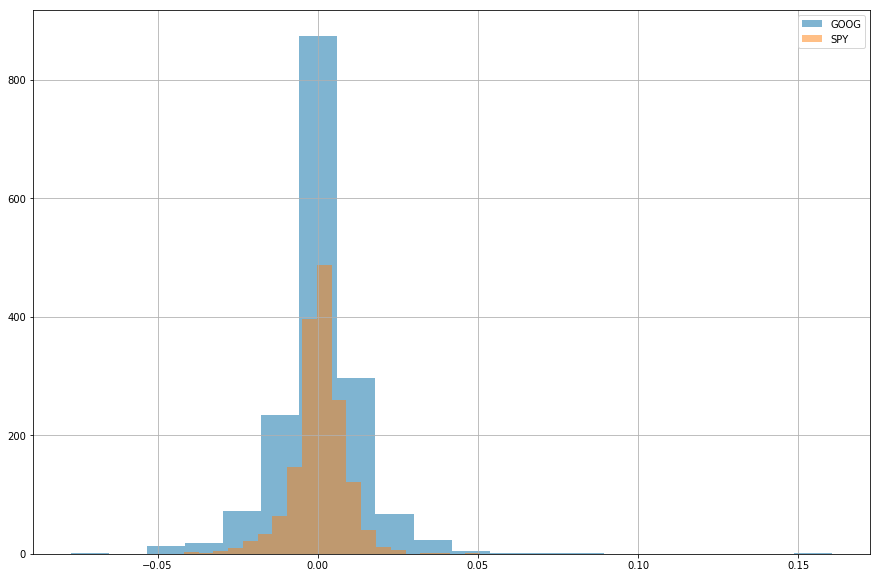

In [73]:
daily_returns['GOOG'].hist(bins=20, label="GOOG", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

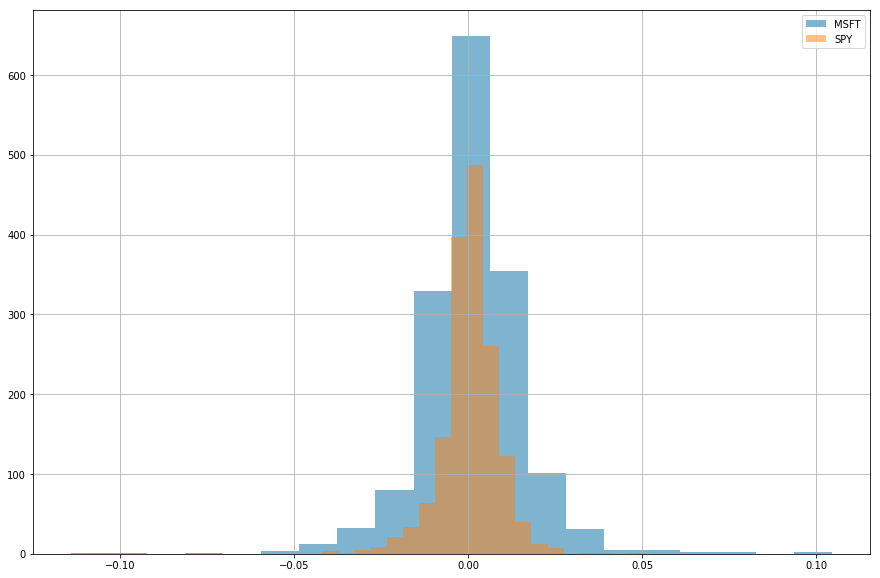

In [74]:
daily_returns['MSFT'].hist(bins=20, label="MSFT", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

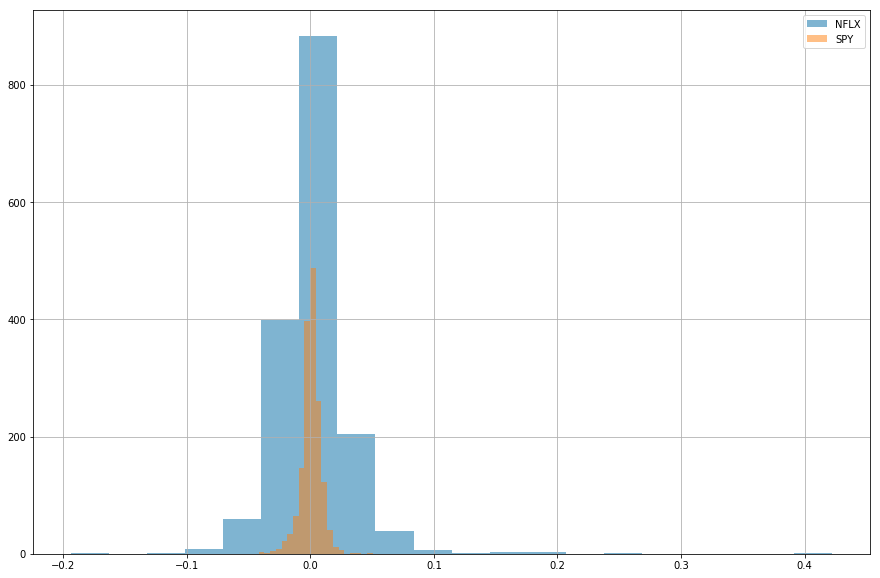

In [75]:
daily_returns['NFLX'].hist(bins=20, label="NFLX", alpha = 0.5)
daily_returns['SPY'].hist(bins=20, label="SPY", alpha = 0.5)
plt.legend(loc='upper right')

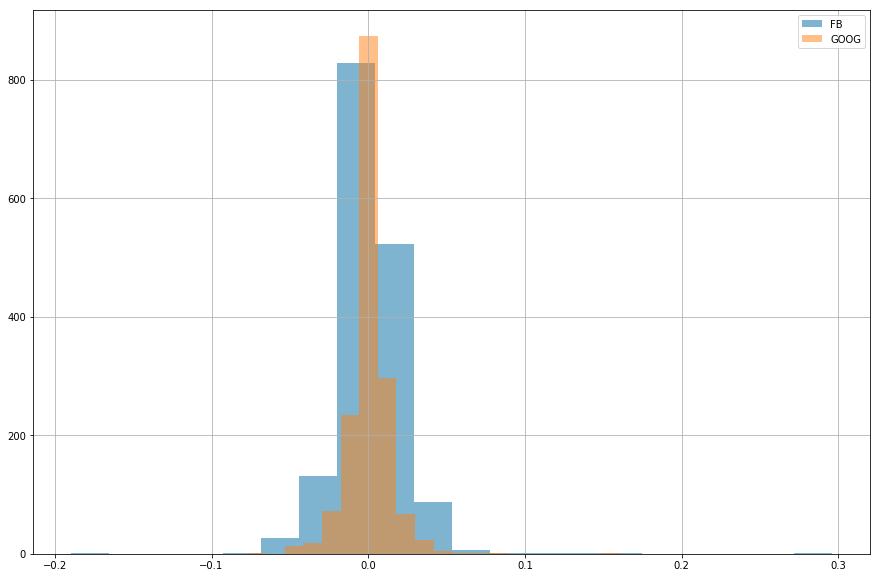

In [27]:
daily_returns['FB'].hist(bins=20, label="FB", alpha = 0.5)
daily_returns['GOOG'].hist(bins=20, label="GOOG", alpha = 0.5)
plt.legend(loc='upper right')

beta_GOOG = 0.3016664705554103
alpha_GOOG = 0.00011843215121172437


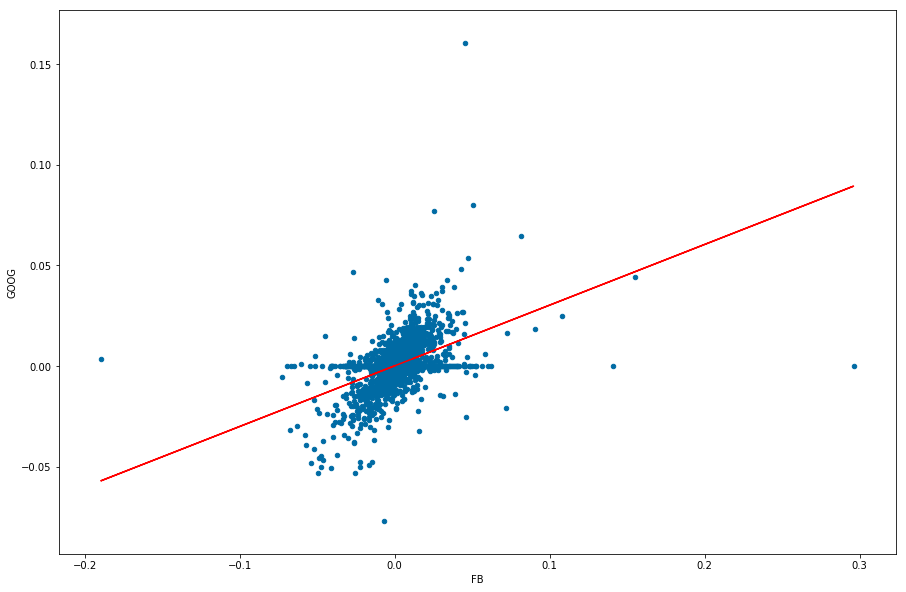

In [28]:
# Check the existence of correlations between stock prices through the scatter plot

daily_returns.plot(kind='scatter', x='FB', y='GOOG')

idx = np.isfinite(daily_returns['FB']) & np.isfinite(daily_returns['GOOG'])

beta_GOOG, alpha_GOOG = np.polyfit(daily_returns['FB'][idx], daily_returns['GOOG'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['FB'], beta_GOOG*daily_returns['FB'] + alpha_GOOG, '-', color='r')
    
print("beta_GOOG =", beta_GOOG)
print("alpha_GOOG =", alpha_GOOG)

In [29]:
# Check the existence of correlations between stock prices through the correlation matrix

print(daily_returns.corr(method='pearson'))

           SPY      AAPL      AMZN        FB      GOOG      MSFT      NFLX
SPY   1.000000  0.563432  0.574477  0.470441  0.616815  0.674873  0.409142
AAPL  0.563432  1.000000  0.365650  0.331432  0.435077  0.440112  0.190656
AMZN  0.574477  0.365650  1.000000  0.467944  0.584323  0.496002  0.411266
FB    0.470441  0.331432  0.467944  1.000000  0.469812  0.361279  0.310218
GOOG  0.616815  0.435077  0.584323  0.469812  1.000000  0.570820  0.382457
MSFT  0.674873  0.440112  0.496002  0.361279  0.570820  1.000000  0.317884
NFLX  0.409142  0.190656  0.411266  0.310218  0.382457  0.317884  1.000000


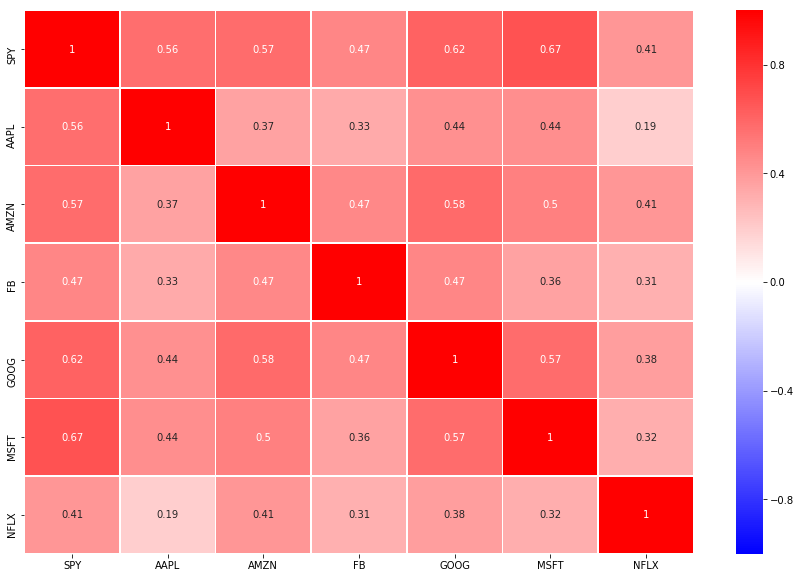

In [30]:
sb.heatmap(daily_returns.corr(method='pearson'), vmin=-1, vmax=1, center = 0, annot=True, linewidths=.5, cmap = "bwr")

beta_AMZN = 0.6413859578421217
alpha_AMZN = 0.0006605703662296566


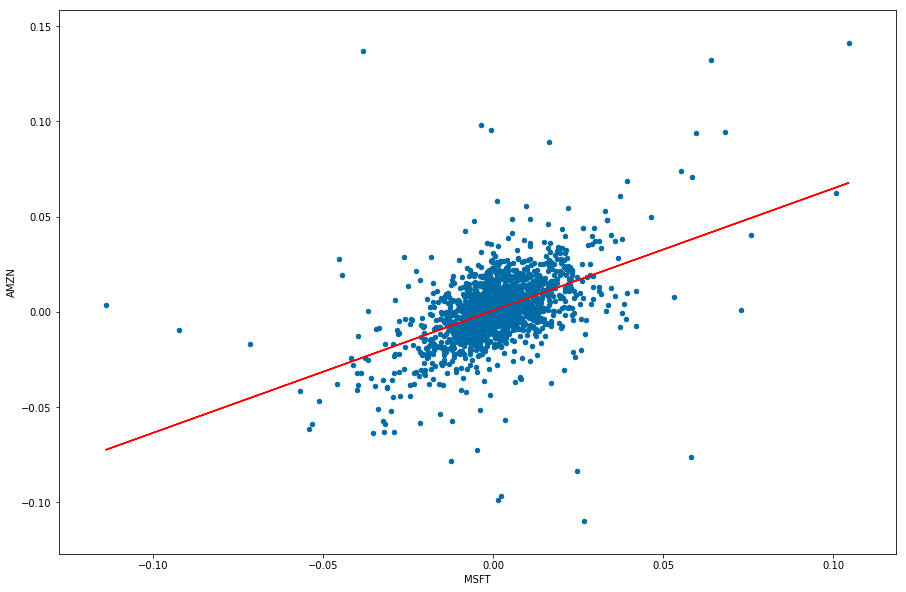

In [31]:
daily_returns.plot(kind='scatter', x='MSFT', y='AMZN')

idx = np.isfinite(daily_returns['MSFT']) & np.isfinite(daily_returns['AMZN'])

beta_AMZN, alpha_AMZN = np.polyfit(daily_returns['MSFT'][idx], daily_returns['AMZN'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['MSFT'], beta_AMZN*daily_returns['MSFT'] + alpha_AMZN, '-', color='r')
    
print("beta_AMZN =", beta_AMZN)
print("alpha_AMZN =", alpha_AMZN)

beta_AAPL = 1.104799634408905
alpha_AAPL = 0.00013963233215702126


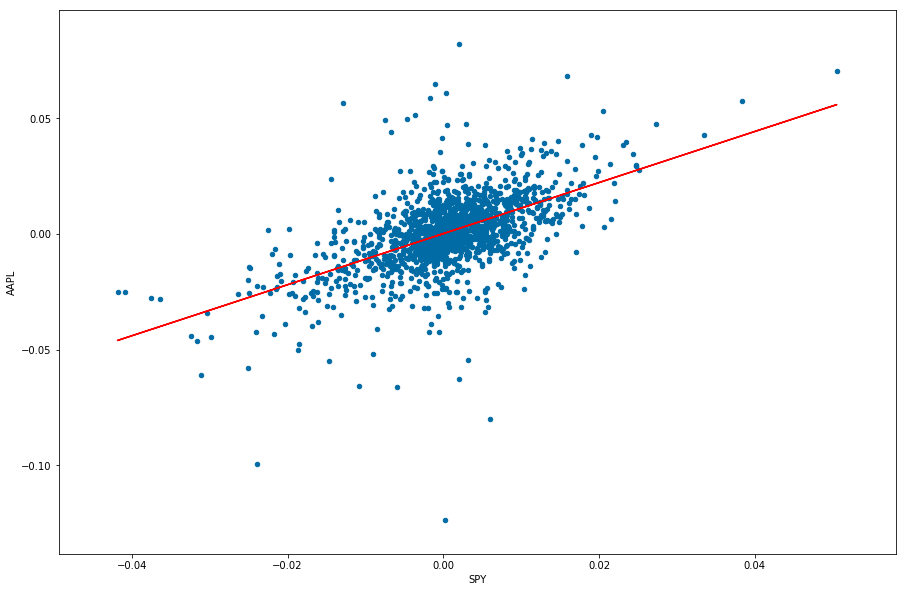

In [76]:
daily_returns.plot(kind='scatter', x='SPY', y='AAPL')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['AAPL'])

beta_AAPL, alpha_AAPL = np.polyfit(daily_returns['SPY'][idx], daily_returns['AAPL'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta_AAPL*daily_returns['SPY'] + alpha_AAPL, '-', color='r')
    
print("beta_AAPL =", beta_AAPL)
print("alpha_AAPL =", alpha_AAPL)

beta_FB = 1.2148547204865623
alpha_FB = 0.0007490957262616423


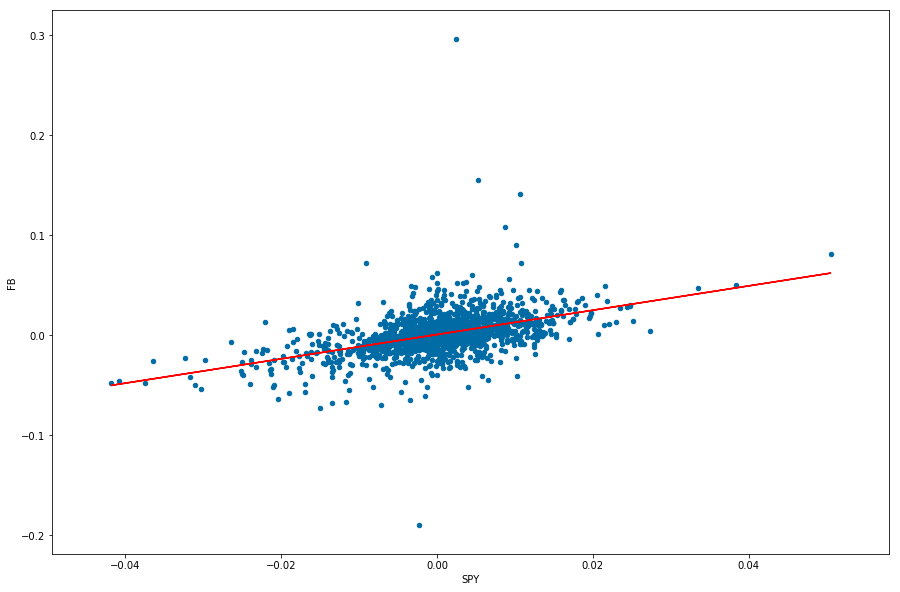

In [77]:
daily_returns.plot(kind='scatter', x='SPY', y='FB')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['FB'])

beta, alpha = np.polyfit(daily_returns['SPY'][idx], daily_returns['FB'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta*daily_returns['SPY'] + alpha, '-', color='r')
    
print("beta_FB =", beta)
print("alpha_FB =", alpha)

beta_GOOG = 1.0227679270149113
alpha_GOOG = 3.741900125846486e-06


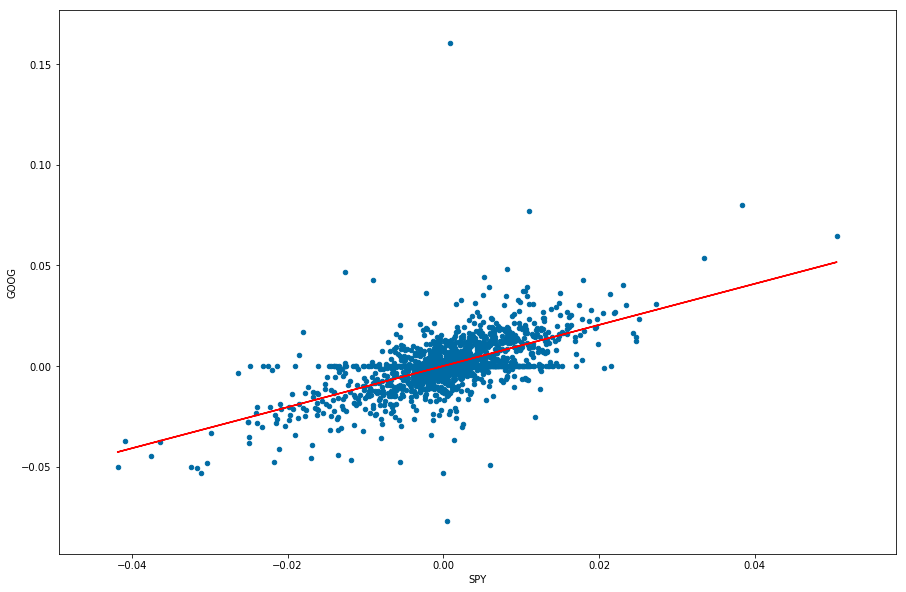

In [78]:
daily_returns.plot(kind='scatter', x='SPY', y='GOOG')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['GOOG'])

beta, alpha = np.polyfit(daily_returns['SPY'][idx], daily_returns['GOOG'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta*daily_returns['SPY'] + alpha, '-', color='r')
    
print("beta_GOOG =", beta)
print("alpha_GOOG =", alpha)

beta_MSFT = 1.2269852465325946
alpha_MSFT = 0.000516786693617029


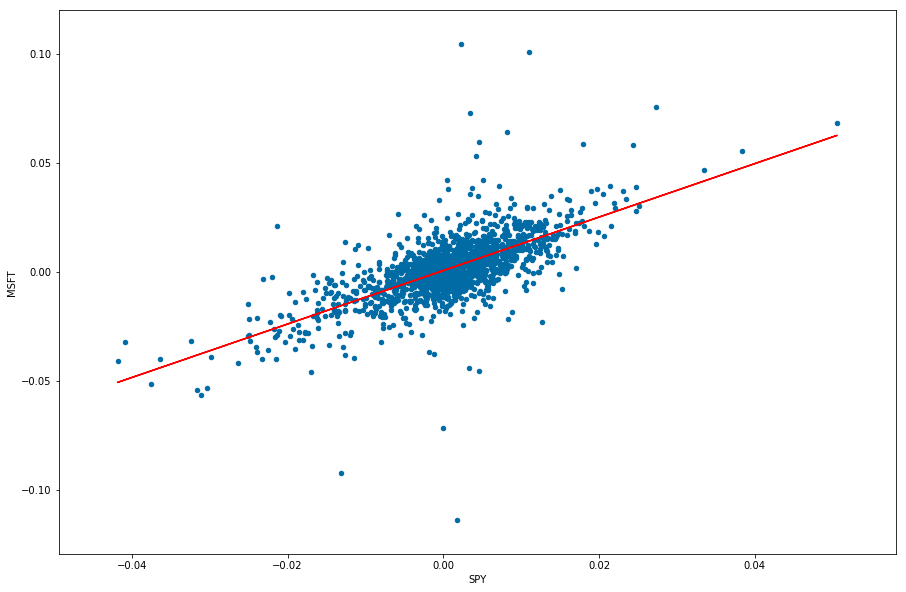

In [79]:
daily_returns.plot(kind='scatter', x='SPY', y='MSFT')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['MSFT'])

beta, alpha = np.polyfit(daily_returns['SPY'][idx], daily_returns['MSFT'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta*daily_returns['SPY'] + alpha, '-', color='r')
    
print("beta_MSFT =", beta)
print("alpha_MSFT =", alpha)

beta_NFLX = 1.4940255275528362
alpha_NFLX = 0.0016947498604592166


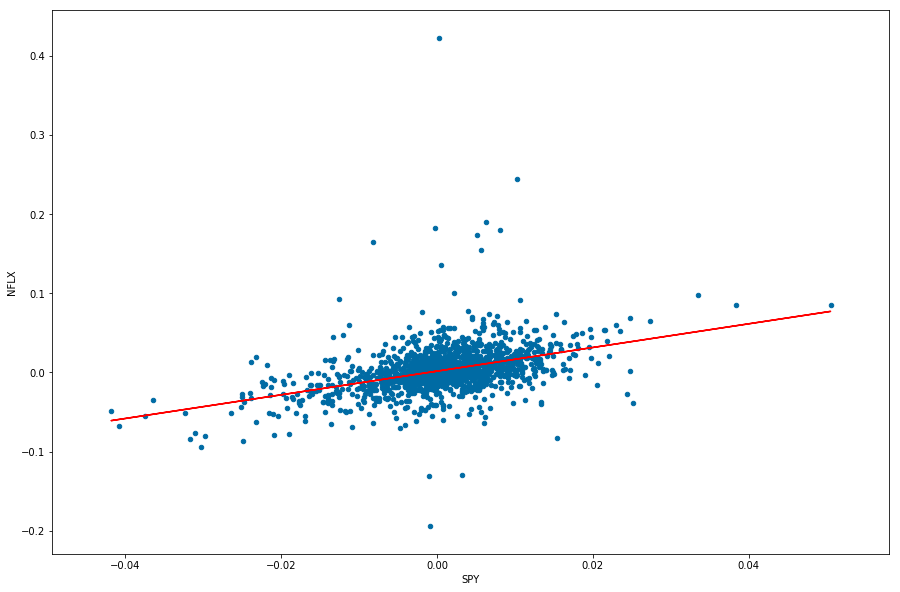

In [80]:
daily_returns.plot(kind='scatter', x='SPY', y='NFLX')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['NFLX'])

beta, alpha = np.polyfit(daily_returns['SPY'][idx], daily_returns['NFLX'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta*daily_returns['SPY'] + alpha, '-', color='r')
    
print("beta_NFLX =", beta)
print("alpha_NFLX =", alpha)

beta_AMZN = 1.3505974778119758
alpha_AMZN = 0.0006994613180588168


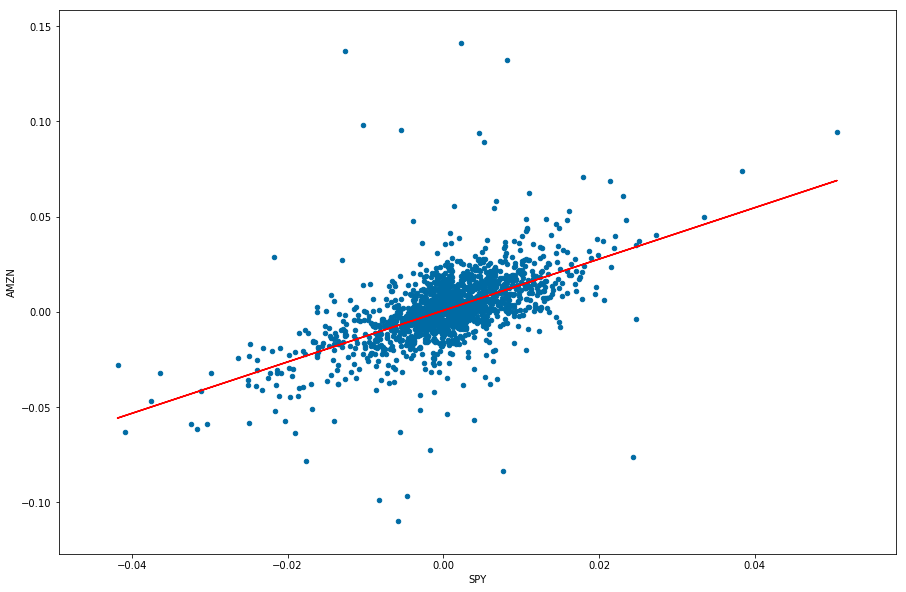

In [32]:
daily_returns.plot(kind='scatter', x='SPY', y='AMZN')

idx = np.isfinite(daily_returns['SPY']) & np.isfinite(daily_returns['AMZN'])

beta_AMZN, alpha_AMZN = np.polyfit(daily_returns['SPY'][idx], daily_returns['AMZN'][idx], 1) # degree 1: y = b*x + a
plt.plot(daily_returns['SPY'], beta_AMZN*daily_returns['SPY'] + alpha_AMZN, '-', color='r')
    
print("beta_AMZN =", beta_AMZN)
print("alpha_AMZN =", alpha_AMZN)

In [33]:
# Compute cumulative daily returns

def compute_cumulative_return(df):
    cum_returns = df.copy()
    cum_returns = (df/df.iloc[0,:]) - 1 
    return cum_returns

In [34]:
cum_returns = compute_cumulative_return(df)

In [35]:
cum_returns.head()

,SPY,AAPL,AMZN,FB,GOOG,MSFT,NFLX
date,,,,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2013-01-03,-0.002231,-0.012629,0.004547,-0.008214,0.0,-0.013393,0.049778
2013-01-04,0.002122,-0.040125,0.007151,0.027143,0.0,-0.031860,0.043144
2013-01-07,-0.000619,-0.045772,0.043330,0.050761,0.0,-0.033669,0.078148
2013-01-08,-0.003494,-0.043204,0.035249,0.037882,0.0,-0.038738,0.055933


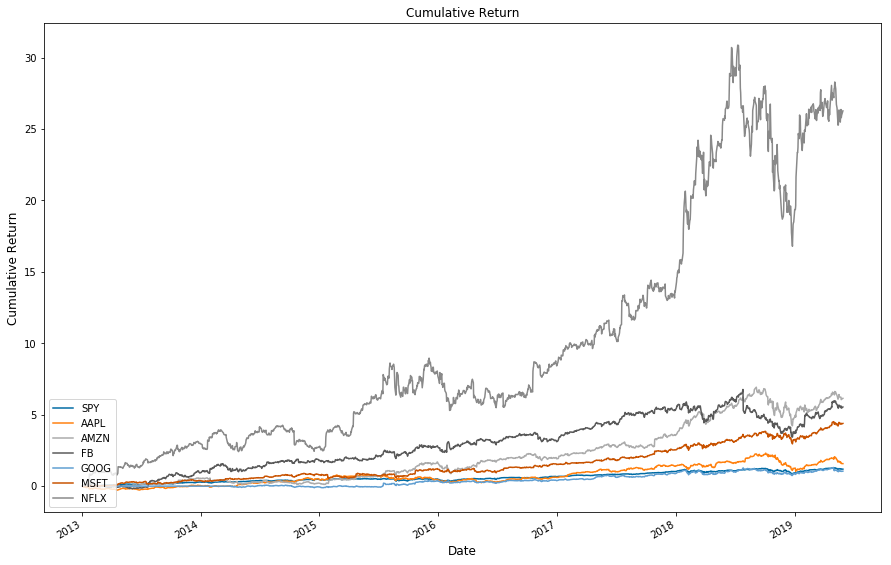

In [36]:
ax = cum_returns.plot(title='Cumulative Return')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Cumulative Return", fontsize=12)
ax.legend(loc='lower left')
plt.show()

In [37]:
# Calculul statisticilor descriptive pentru pretul actiunilor
print("Medie: \n")
print(df.mean())
print("\n") 
print("Mediana: \n") 
print(df.median())
print("\n")
print("Abatere standard: \n")
print(df.std())
print("\n")

Medie: 

SPY     207.557309
AAPL    118.857846
AMZN    799.000719
FB      110.195564
GOOG    773.923736
MSFT     58.699064
NFLX    142.523200
dtype: float64


Mediana: 

SPY     195.2669
AAPL    108.6524
AMZN    658.6400
FB      110.1000
GOOG    724.8900
MSFT     49.3177
NFLX    100.2300
dtype: float64


Abatere standard: 

SPY      44.002065
AAPL     44.806434
AMZN    524.240733
FB       50.365095
GOOG    229.949306
MSFT     27.677712
NFLX    109.217684
dtype: float64




In [38]:
# Compute rolling averages, rolling standard deviations and Bollinger bands

def get_rolling_mean(df, window):   
    return df.rolling(window=window, center=False).mean()

def get_rolling_std(df, window):
    return df.rolling(window=window, center=False).std()

def get_bollinger_bands(rm, rstd):
    return rm+2*rstd, rm-2*rstd

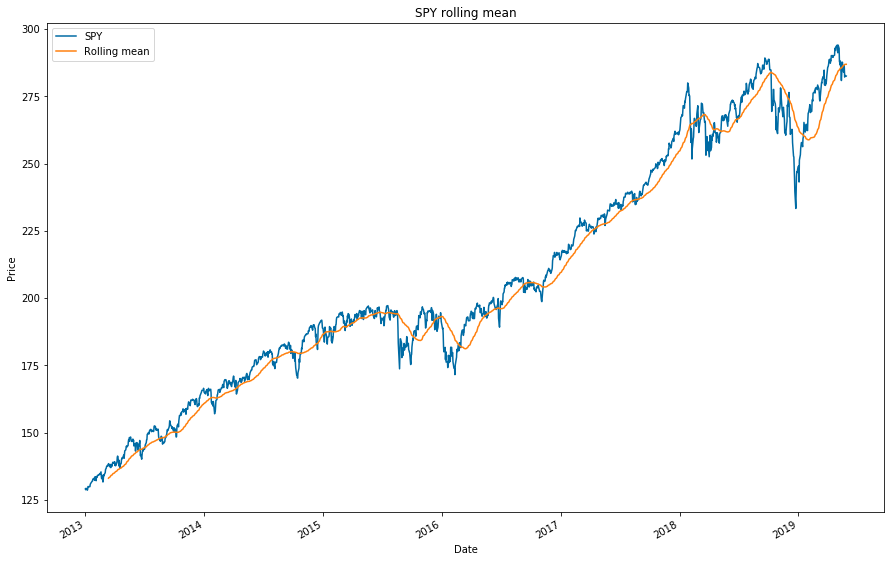

In [39]:
ax = df['SPY'].plot(title='SPY rolling mean', label='SPY')
    
rm_SPY = df['SPY'].rolling(window=50, center=False).mean()
    
rm_SPY.plot(label='Rolling mean', ax=ax)
    
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()
    

In [40]:
"""Compute Bollinger Bands"""
def bollinger_bands(df, symbol):
    # (1) rolling averages
    rm = get_rolling_mean(df[symbol], window=50)
    # (2) rolling standard deviations
    rstd = get_rolling_std(df[symbol], window=50)
    # (3) Bollinger band - 2 standard deviations from the mean (both positive and negative)
    upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
    # Store new columns
    string_name = symbol + '_ROLLING_MEAN'
    df[string_name] = rm
    string_name = symbol + '_UPPER_BAND'
    df[string_name] = upper_band
    string_name = symbol + '_LOWER_BAND'
    df[string_name] = lower_band
    
    # Graphical Representation
    ax2 = df[symbol].plot(title='Bollinger Bands', label=symbol)
    rm.plot(label='Rolling mean', ax=ax2)
    upper_band.plot(label='Upper band', ax=ax2)
    lower_band.plot(label='Lower band', ax=ax2)
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Price")
    ax2.legend(loc='upper left')
    plt.show()

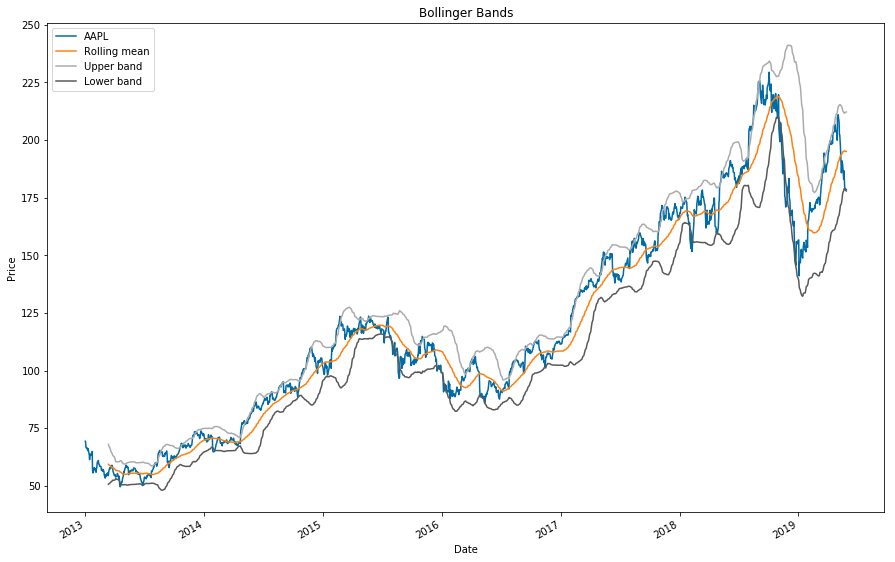

In [53]:
bollinger_bands(df, 'AAPL')


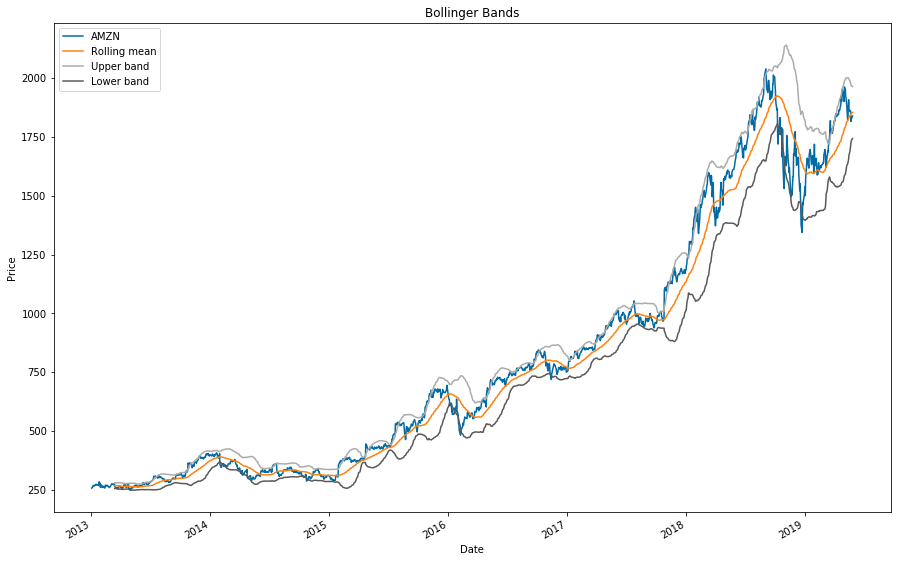

In [54]:
bollinger_bands(df, 'AMZN')


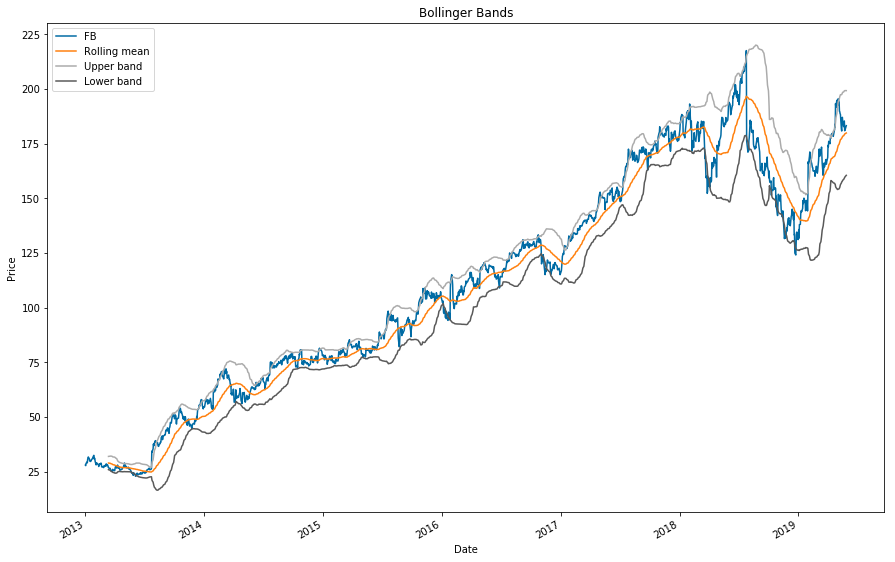

In [55]:
bollinger_bands(df, 'FB')


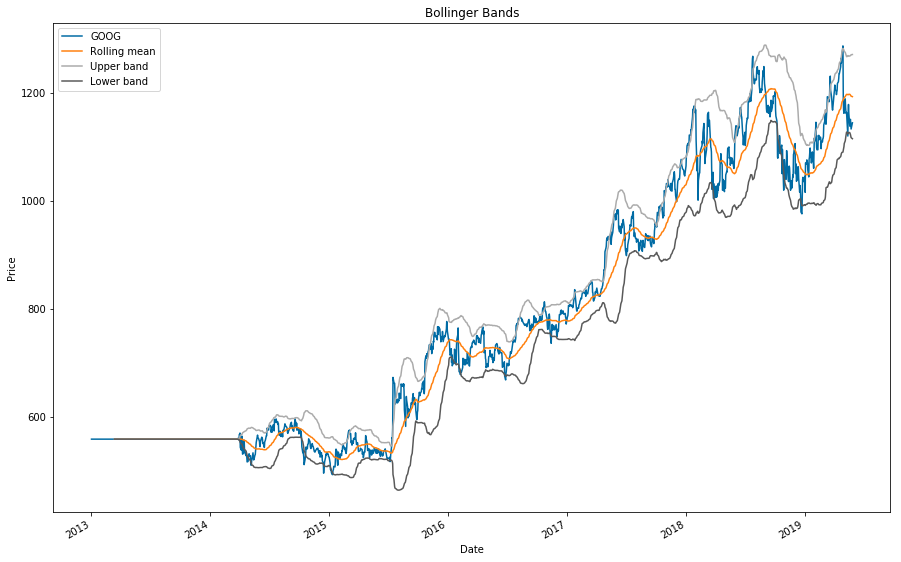

In [56]:
bollinger_bands(df, 'GOOG')


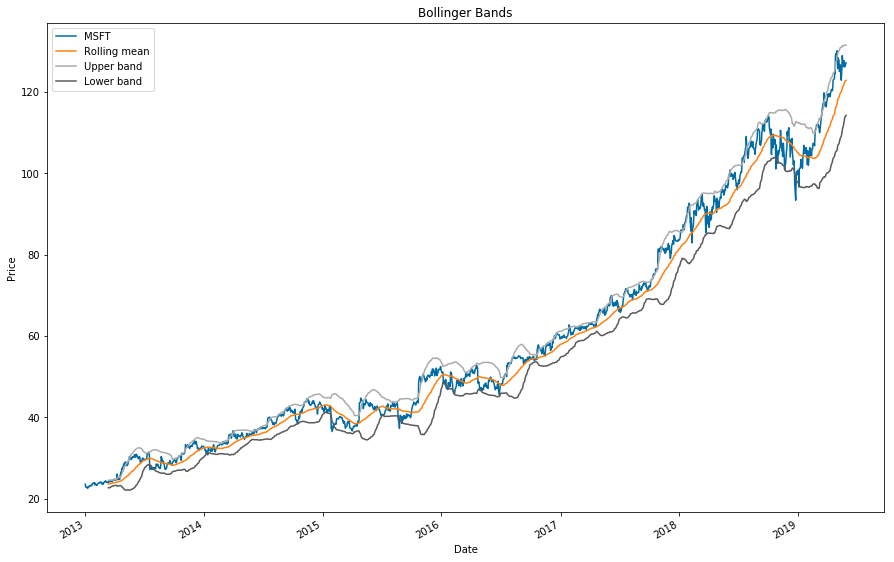

In [57]:
bollinger_bands(df, 'MSFT')


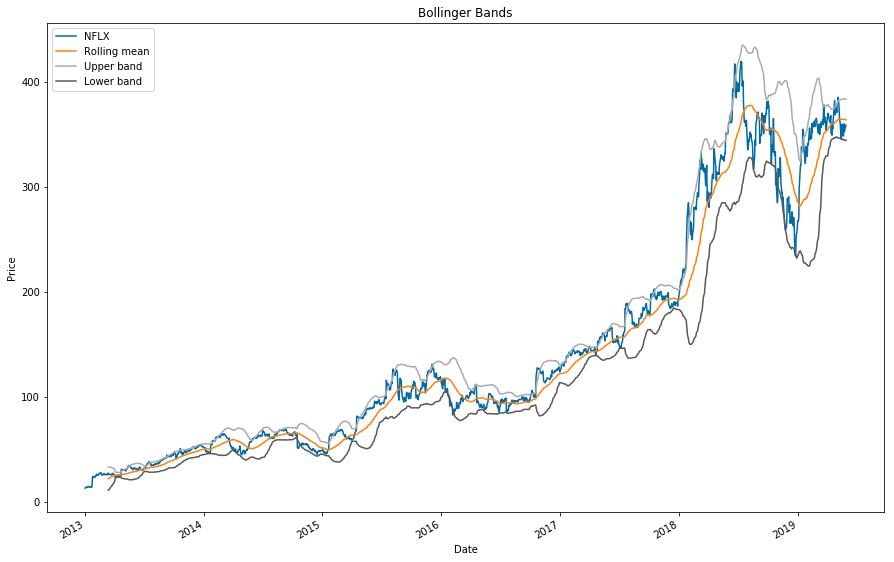

In [58]:
bollinger_bands(df, 'NFLX')


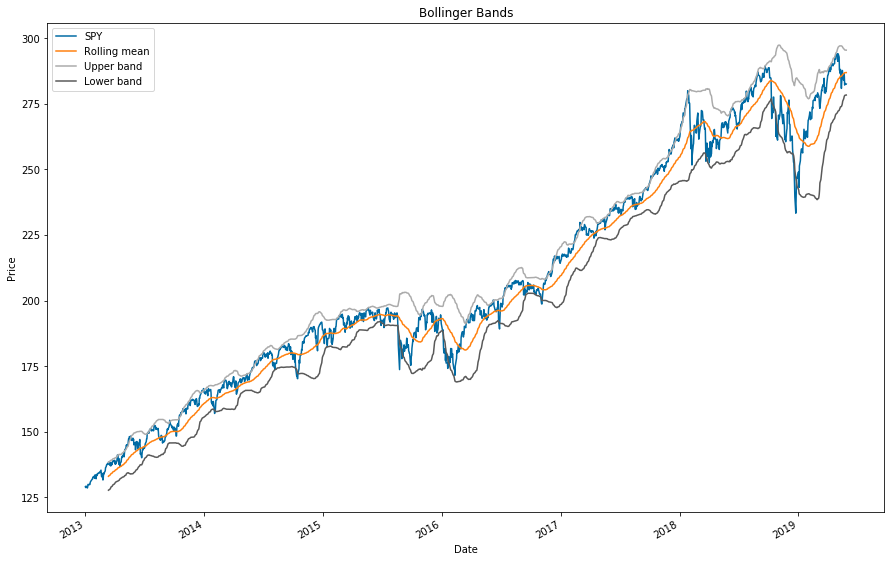

In [59]:
bollinger_bands(df, 'SPY')

In [42]:
df.to_csv('out.csv',index=True)

In [43]:
daily_returns.to_csv('daily_returns.csv', index=True)

In [44]:
cum_returns.to_csv('cum_returns.csv', index=True)

In [45]:
def export_csv(ticker_symbol, df):
    df['date'] = pd.to_datetime(df['date']).dt.date
    filename = 'daily_adjusted_'+ticker_symbol+'.csv'
    df.to_csv(filename,index=False)

In [46]:
export_csv('SPY', SPY)
export_csv('AAPL', AAPL)
export_csv('AMZN', AMZN)
export_csv('FB', FB)
export_csv('GOOG', GOOG)
export_csv('MSFT', MSFT)
export_csv('NFLX', NFLX)

In [97]:
# Annualized daily returns

daily_returns_apr = daily_returns * 252 * 100    # Annual daily returns for 252 trading days (100 -> %)
daily_returns_apr.tail()

,SPY,AAPL,AMZN,FB,GOOG,MSFT,NFLX
date,,,,,,,
2019-05-21,227.194929,483.106669,-19.656046,289.623468,238.535365,135.762954,445.928011
2019-05-22,-77.400440,-515.884244,29.303588,68.174440,39.236972,152.907801,388.381743
2019-05-23,-307.908833,-430.156472,-598.941753,-605.115476,-233.086102,-294.101982,-526.795096
2019-05-24,57.163111,-96.782812,108.268888,26.472052,-161.259500,11.982882,155.975128
2019-05-28,-22.724379,-66.178689,214.156048,296.454214,256.564355,182.652091,289.466859


In [85]:
import quandl
# Importing an example of non-risky return (interest on investing in a treasury bail)

start = datetime.datetime(2013,1,1)
end = datetime.date.today()

tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
tbill.tail()

,Value
Date,
2018-12-01,2.37
2019-01-01,2.37
2019-02-01,2.39
2019-03-01,2.40
2019-04-01,2.38


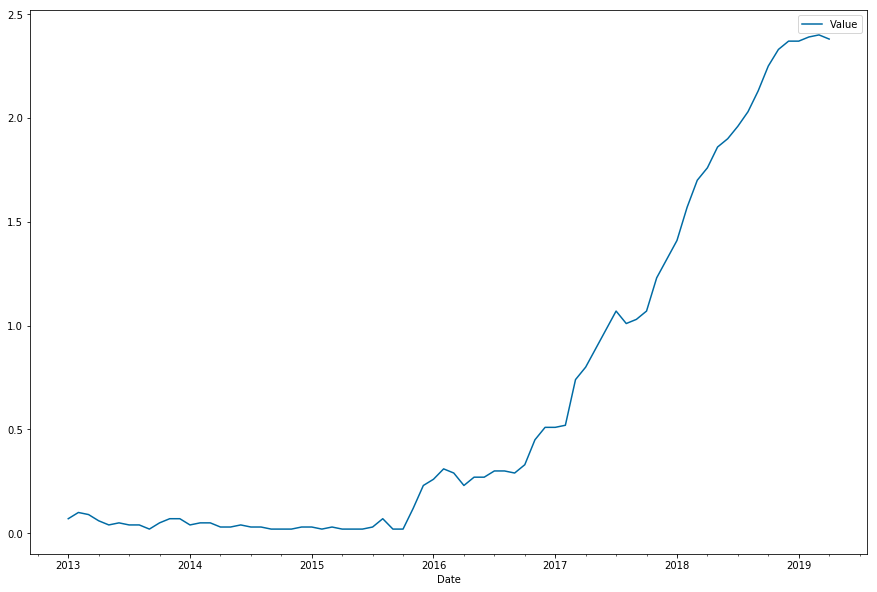

In [83]:
tbill.plot()

In [102]:
rfr = tbill.iloc[-1, 0]    # Most recent value
rfr

2.38

In [98]:
correlation = daily_returns_apr.drop("SPY", 1).corrwith(daily_returns_apr.SPY)    
correlation

AAPL    0.563432
AMZN    0.574477
FB      0.470441
GOOG    0.616815
MSFT    0.674873
NFLX    0.409142
dtype: float64

In [99]:
sy = daily_returns_apr.drop("SPY", 1).std()
sx = daily_returns_apr.SPY.std()
sy


AAPL    398.918598
AMZN    478.294726
FB      525.365754
GOOG    337.337382
MSFT    369.879257
NFLX    742.892959
dtype: float64

In [100]:
sx

203.44288099261567

In [103]:
ybar = daily_returns_apr.drop("SPY", 1).mean() - rfr
xbar = daily_returns_apr.SPY.mean() - rfr
ybar

AAPL    15.590495
AMZN    32.913439
FB      32.388590
GOOG    11.093008
MSFT    26.693081
NFLX    59.870876
dtype: float64

In [104]:
xbar

10.700887555068498

In [109]:
beta = correlation * sy / sx
alpha = ybar - beta * xbar
print('beta')
beta

beta


AAPL    1.104800
AMZN    1.350597
FB      1.214855
GOOG    1.022768
MSFT    1.226985
NFLX    1.494026
dtype: float64

In [110]:
print('alpha')
alpha

alpha


AAPL     3.768158
AMZN    18.460847
FB      19.388567
GOOG     0.148484
MSFT    13.563250
NFLX    43.883477
dtype: float64

In [111]:
# Compute Sharp Ratio

sharpe = (ybar - rfr)/sy
print('Sharp Ratio')
sharpe

Sharp Ratio


AAPL    0.033116
AMZN    0.063838
FB      0.057119
GOOG    0.025829
MSFT    0.065732
NFLX    0.077388
dtype: float64

In [108]:
(xbar - rfr)/sx

0.04090036237429473

Bibliography 

Python Analysis of Stocks https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/

ALPHA VANTAGE Preprocessed Free APIs in JSON and CSV formats https://www.profitaddaweb.com/2018/07/alpha-vantage-preprocessed-free-apis-in.html

Machine Learning for Trading https://eu.udacity.com/course/machine-learning-for-trading--ud501 